In [21]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json

# Interpolation Analysis

## 1. Get the data from previous runs


In [22]:
results = json.load(open("./Results/Interpolation/Interpolation_Timings.json", "r"))

## 2. Transform the data
We have per method performed, n different sizes, and each size has an array of timings. We want to see the average time per size, and plot them in a graph.

In [23]:
df = pd.DataFrame(results)
# map the values to np.mean
df = df.applymap(lambda x: float(np.mean(x)))
df

# change index to float
df.index = df.index.map(lambda x: float(x))

# 3. Plot the data


## Normal Plot

In [24]:
df.index.astype(float)

Float64Index([ 100.0,  200.0,  300.0,  400.0,  500.0,  600.0,  700.0,  800.0,
               900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0,
              1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0,
              2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0,
              3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0,
              4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0,
              4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0,
              5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0,
              6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0,
              7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0,
              8100.0, 8200.0, 8300.0, 8400.0, 8500.0, 8600.0, 8700.0, 8800.0,
              8900.0, 9000.0, 9100.0, 9200.0, 9300.0, 9400.0, 9500.0, 9600.0,
              9700.0, 9800.0, 9900.0],
             dtype='float

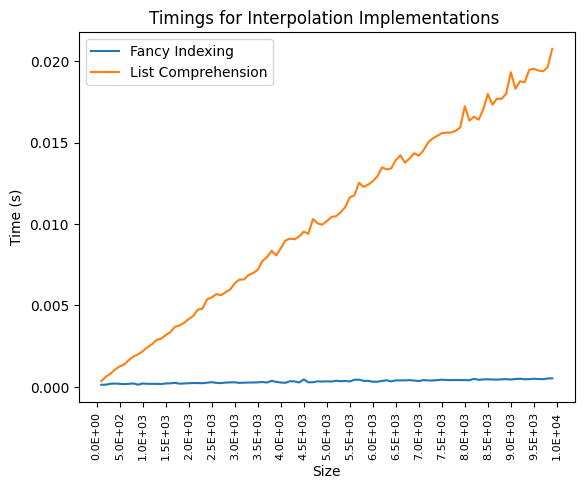

In [72]:
# Plot the results using matplotlib
from matplotlib.ticker import StrMethodFormatter

plt.figure()
for mode in results.keys():
    plt.plot(df.index, df[mode], "-")
plt.title(f"Timings for Interpolation Implementations ")
plt.xlabel("Size")
plt.ylabel("Time (s)")
plt.legend(
    [
        "Fancy Indexing",
        "List Comprehension",
    ]
)
'''
# Rotate the xticks
# Smaller font on the xticks
# using scientific notation for xticks
plt.ticklabel_format(style="sci", axis="x", scilimits=(0,0))
# more ticks
'''
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

plt.locator_params(axis="x", nbins=40)

# get ax
ax = plt.gca()
# using scientific notation for xticks
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1E}'))

# Save figure high resolution without cutting off
plt.savefig("./Results/Interpolation/Interpolation Timings.png", dpi=600, bbox_inches="tight")

# 4. Linear Regression
Since the data is difficult to read, we can perform a linear regression to get a better idea of the trend.


Linear Regression Indexed List: y = 3.4812e-08x + 0.0002 --> Slope: 3.48119e-08
Linear Regression List Compresion: y = 2.0237e-06x + 0.0003 --> Slope: 2.02374e-06


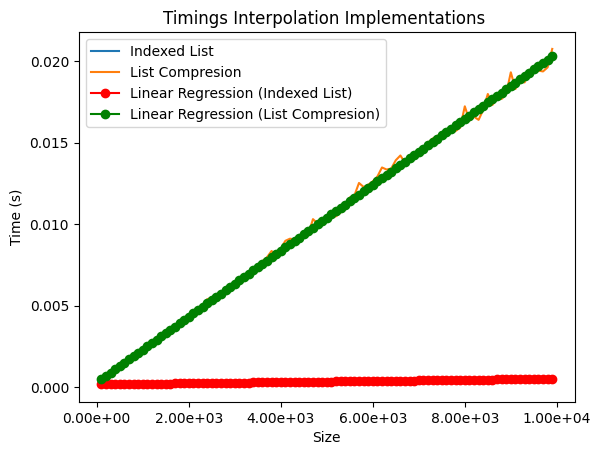

In [56]:
# linear regression
from scipy.stats import linregress


x = np.array(list(map(lambda y: float(y), df.index)))

# Get the slope and intercept of the linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x, df["Indexed List"])
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x, df["List Compresion"])

print(
    f"Linear Regression Indexed List: y = {slope1:.4e}x + {intercept1:.4f} --> Slope: {slope1:.5e}"
)
print(
    f"Linear Regression List Compresion: y = {slope2:.4e}x + {intercept2:.4f} --> Slope: {slope2:.5e}"
)


# Plot the results using matplotlib
plt.figure()
for mode in results.keys():
    plt.plot(x, df[mode], "-", label=mode)


# Plot the linear regression
plt.plot(x, slope1 * x + intercept1, "ro-", label="Linear Regression (Indexed List)")
plt.plot(x, slope2 * x + intercept2, "go-", label="Linear Regression (List Compresion)")

plt.title(f"Timings Interpolation Implementations ")
plt.xlabel("Size")
plt.ylabel("Time (s)")
plt.legend()

'''
# Rotate the xticks
plt.xticks(rotation=90)
# Smaller font on the xticks
plt.xticks(fontsize=4)
'''
# get ax
ax = plt.gca()
# using scientific notation for xticks
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2e}'))

# Save figure high resolution
plt.savefig("./Results/Interpolation/Interpolation_Timings_Regression.png", dpi=1000)